# Trees & Random Forests
willarevalo.developer@gmail.com

In [1]:
import numpy as np # For numeric operation
import pandas as pd # For Tabular information
import matplotlib.pyplot as plt # For draw plots
%matplotlib inline
import sklearn as sk # For Machine Learnig Algorithms
import kaggle # For download dataset with api
import missingno as msno # Tools for missing values

print(f'numpy v.{np.__version__}\npandas v.{pd.__version__}\nsklearn v.{sk.__version__}\nmissingno v.{msno.__version__}')


numpy v.1.18.1
pandas v.1.0.1
sklearn v.0.22.1
missingno v.0.4.2


## EDA

In [2]:
# Download Dataset

kaggle.api.dataset_download_cli('gpandi007/usa-housing-dataset', path='www.kaggle.com/gpandi007/usa-housing-dataset', unzip=True)
housing_test = pd.read_csv(r".\www.kaggle.com\gpandi007\usa-housing-dataset\housing_test.csv")

housing_train = pd.read_csv(r".\www.kaggle.com\gpandi007\usa-housing-dataset\housing_train.csv")
thread = kaggle.api.datasets_view('gpandi007','usa-housing-dataset',async_req=True)
result = thread.get()
result

100%|██████████| 179k/179k [00:00<00:00, 1.06MB/s]

{'id': 8855,
 'ref': 'gpandi007/usa-housing-dataset',
 'subtitle': 'House Sales Price Predictions',
 'tags': [{'ref': 'business',
   'competitionCount': 1,
   'datasetCount': 8612,
   'description': 'Businesses are organizational entities that drive economic activity. Explore the inner workings of things like HR practices, product sales, and customer happiness in these competitions, kernels, and datasets.',
   'fullPath': 'society and social sciences > society > business',
   'isAutomatic': False,
   'name': 'business',
   'scriptCount': 120,
   'totalCount': 8733},
  {'ref': 'society',
   'competitionCount': 0,
   'datasetCount': 1923,
   'description': None,
   'fullPath': 'society and social sciences > society',
   'isAutomatic': False,
   'name': 'society',
   'scriptCount': 7,
   'totalCount': 1930},
  {'ref': 'finance',
   'competitionCount': 4,
   'datasetCount': 1200,
   'description': "The finance tag covers datasets and kernels about money and investing. If you need to test s

In [3]:
# Shape
print(f"""housing_test have {housing_test.shape[0]} rows by {housing_test.shape[1]} columns
housing_train have {housing_train.shape[0]} rows by {housing_train.shape[1]} columns""")

housing_test have 1459 rows by 80 columns
housing_train have 1460 rows by 81 columns


In [4]:
# Remove duplicates
housing_train = housing_train.drop_duplicates('Id')

In [5]:
# Description Number
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Description Object
housing_train.describe(include = ['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


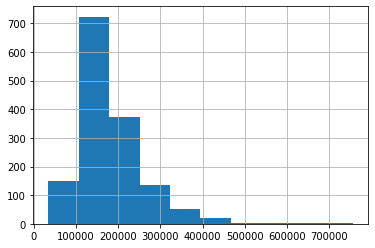

In [7]:
housing_train.SalePrice.hist()

In [8]:
# Create tarjet for classifier models
conditions = [
    housing_train.SalePrice < 100001,
    (housing_train.SalePrice > 100000) & (housing_train.SalePrice < 500001),
    housing_train.SalePrice > 500000]
choices = [1,2,3]
housing_train['SalePriceGroup'] = np.select(conditions, choices, default=np.nan)

2.0    1328
1.0     123
3.0       9
Name: SalePriceGroup, dtype: int64

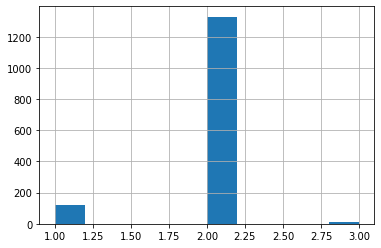

In [9]:
housing_train['SalePriceGroup'].hist()
housing_train['SalePriceGroup'].value_counts()

Target have a correct gaussian distribution, whithout outliers

In [10]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1201 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   Alley           91 non-null     object 
 7   LotShape        1460 non-null   object 
 8   LandContour     1460 non-null   object 
 9   Utilities       1460 non-null   object 
 10  LotConfig       1460 non-null   object 
 11  LandSlope       1460 non-null   object 
 12  Neighborhood    1460 non-null   object 
 13  Condition1      1460 non-null   object 
 14  Condition2      1460 non-null   object 
 15  BldgType        1460 non-null   object 
 16  HouseStyle      1460 non-null   object 
 17  OverallQual     1460 non-null   i

## Correlation

In [11]:
# Correlation number columns
corr = housing_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## Handling Data

In [12]:
housing_train.notnull().apply(pd.Series.value_counts)
# When False have a number is for this column have nulls, like LotFrontage have nulls

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceGroup
False,NaN,NaN,NaN,259,NaN,NaN,1369,NaN,NaN,NaN,...,1453,1179,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,1460.0,1460.0,1460.0,1201,1460.0,1460.0,91,1460.0,1460.0,1460.0,...,7,281,54,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0


In [13]:
 housing_train.isnull().any().value_counts()

False    63
True     19
dtype: int64

We have 61 features without nulls and 19 with nulls

In [14]:
columns_with_nulls = [i for i,j in dict(housing_train.isnull().any()).items()
                      if j == True]
print(*[(i,j) for i,j in enumerate(columns_with_nulls,1)], sep="\n")

(1, 'LotFrontage')
(2, 'Alley')
(3, 'MasVnrType')
(4, 'MasVnrArea')
(5, 'BsmtQual')
(6, 'BsmtCond')
(7, 'BsmtExposure')
(8, 'BsmtFinType1')
(9, 'BsmtFinType2')
(10, 'Electrical')
(11, 'FireplaceQu')
(12, 'GarageType')
(13, 'GarageYrBlt')
(14, 'GarageFinish')
(15, 'GarageQual')
(16, 'GarageCond')
(17, 'PoolQC')
(18, 'Fence')
(19, 'MiscFeature')


In [15]:
housing_train[columns_with_nulls].notnull().apply(pd.Series.value_counts)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
False,259,1369,8,8,37,37,38,37,38,1,690,81,81,81,81,81,1453,1179,1406
True,1201,91,1452,1452,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379,1379,7,281,54


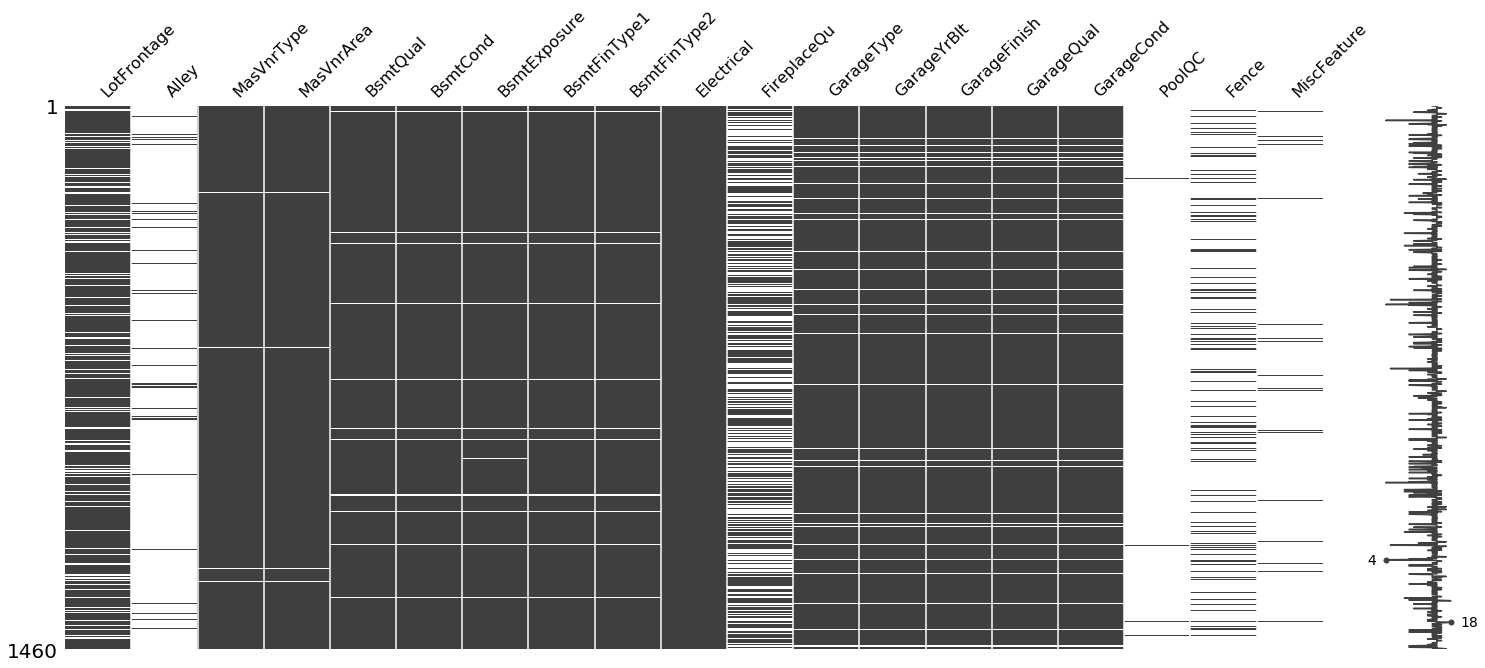

In [16]:
msno.matrix(housing_train[columns_with_nulls]);

In [17]:
housing_train[columns_with_nulls].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


### Data fields
1. **LotFrontage**: Linear feet of street connected to property

1. **Alley**: Type of alley access

1. **MasVnrType**: Masonry veneer type

1. **MasVnrArea**: Masonry veneer area in square feet

1. **BsmtQual**: Height of the basement

1. **BsmtCond**: General condition of the basement

1. **BsmtExposure**: Walkout or garden level basement walls

1. **BsmtFinType1**: Quality of basement finished area

1. **BsmtFinType2**: Quality of second finished area (if present)

1. **Electrical**: Electrical system

1. **FireplaceQu**: Fireplace quality

1. **GarageType**: Garage location

1. **GarageYrBlt**: Year garage was built

1. **GarageFinish**: Interior finish of the garage

1. **GarageQual**: Garage quality

1. **GarageCond**: Garage condition

1. **PoolQC**: Pool quality

1. **Fence**: Fence quality

1. **MiscFeature**: Miscellaneous feature not covered in other categories

In [18]:
housing_train[columns_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [19]:
from sklearn.impute import SimpleImputer 
catimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # for categoric features
numimp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [20]:
# Choices features with the majority values by object type
list_for_imp_cat = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
# List for drop by object type
list_for_drop_cat = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
# List of features with majority values by float type
list_for_imp_float = ['LotFrontage','MasVnrArea','GarageYrBlt']

In [21]:
housing_train = housing_train.copy()

In [22]:
housing_train[list_for_imp_cat] = catimp.fit_transform(housing_train[list_for_imp_cat])

In [23]:
housing_train[list_for_imp_float] = numimp.fit_transform(housing_train[list_for_imp_float])

In [24]:
housing_train[columns_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1460 non-null   object 
 3   MasVnrArea    1460 non-null   float64
 4   BsmtQual      1460 non-null   object 
 5   BsmtCond      1460 non-null   object 
 6   BsmtExposure  1460 non-null   object 
 7   BsmtFinType1  1460 non-null   object 
 8   BsmtFinType2  1460 non-null   object 
 9   Electrical    1460 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1460 non-null   object 
 12  GarageYrBlt   1460 non-null   float64
 13  GarageFinish  1460 non-null   object 
 14  GarageQual    1460 non-null   object 
 15  GarageCond    1460 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [25]:
print(housing_train.shape)
# Drop columns with insignificative values
housing_train = housing_train.drop(columns=list_for_drop_cat, axis=1)
print(housing_train.shape)

(1460, 82)
(1460, 77)


In [26]:
list_cat = [i for i in housing_train if housing_train[i].dtypes == 'object']
list_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [27]:
housing_train[list_cat] = housing_train[list_cat].astype('category')

In [28]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              1460 non-null   int64   
 1   MSSubClass      1460 non-null   int64   
 2   MSZoning        1460 non-null   category
 3   LotFrontage     1460 non-null   float64 
 4   LotArea         1460 non-null   int64   
 5   Street          1460 non-null   category
 6   LotShape        1460 non-null   category
 7   LandContour     1460 non-null   category
 8   Utilities       1460 non-null   category
 9   LotConfig       1460 non-null   category
 10  LandSlope       1460 non-null   category
 11  Neighborhood    1460 non-null   category
 12  Condition1      1460 non-null   category
 13  Condition2      1460 non-null   category
 14  BldgType        1460 non-null   category
 15  HouseStyle      1460 non-null   category
 16  OverallQual     1460 non-null   int64   
 17  OverallCond   

In [29]:
housing_train = pd.get_dummies(housing_train, columns=list_cat)
housing_train.shape

(1460, 273)

In [30]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 273 entries, Id to SaleCondition_Partial
dtypes: float64(4), int64(35), uint8(234)
memory usage: 789.9 KB


In [31]:
# Features and target
X = housing_train.drop(['SalePrice', 'SalePriceGroup'], axis=1)
y = housing_train[['SalePrice', 'SalePriceGroup']]

print(f"""X shape {X.shape}
y shape {y.shape}""")


# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)


print(f"""X_train shape {X_train.shape}
y_train shape {y_train.shape}
X_test shape {X_test.shape}
y_test shape {y_test.shape}""")

X shape (1460, 271)
y shape (1460, 2)
X_train shape (1022, 271)
y_train shape (1022, 2)
X_test shape (438, 271)
y_test shape (438, 2)


__Best features for regressor models__

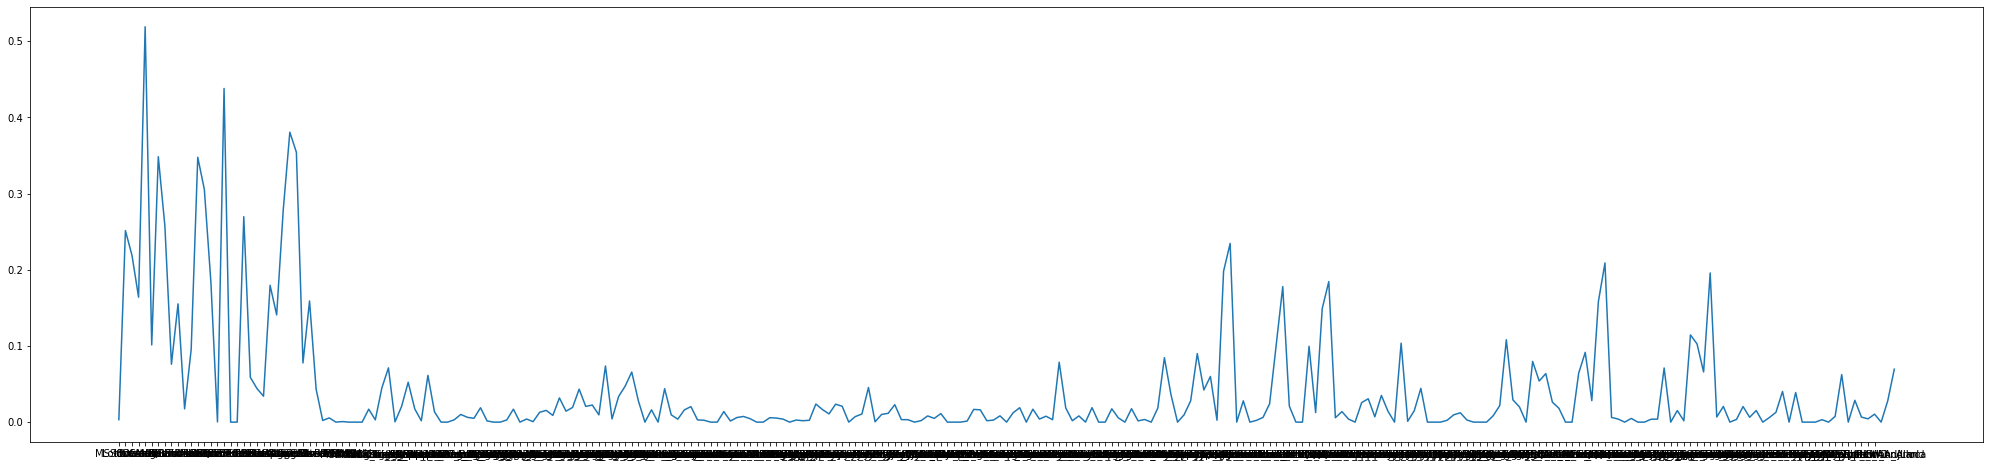

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
regre_selector = SelectKBest(mutual_info_regression, k=10)
regre_selector.fit(X_train,y_train['SalePrice'])
regre_scores = regre_selector.scores_


plt.rcParams["figure.figsize"] = [35,8]
plt.plot(regre_scores)
plt.xticks(np.arange(268),list(X.columns));

In [33]:
regre_best_cols = [X_train.columns[i] for i,j in enumerate(regre_scores) if j > 0.3]
regre_best_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

__Best features for classifier models__

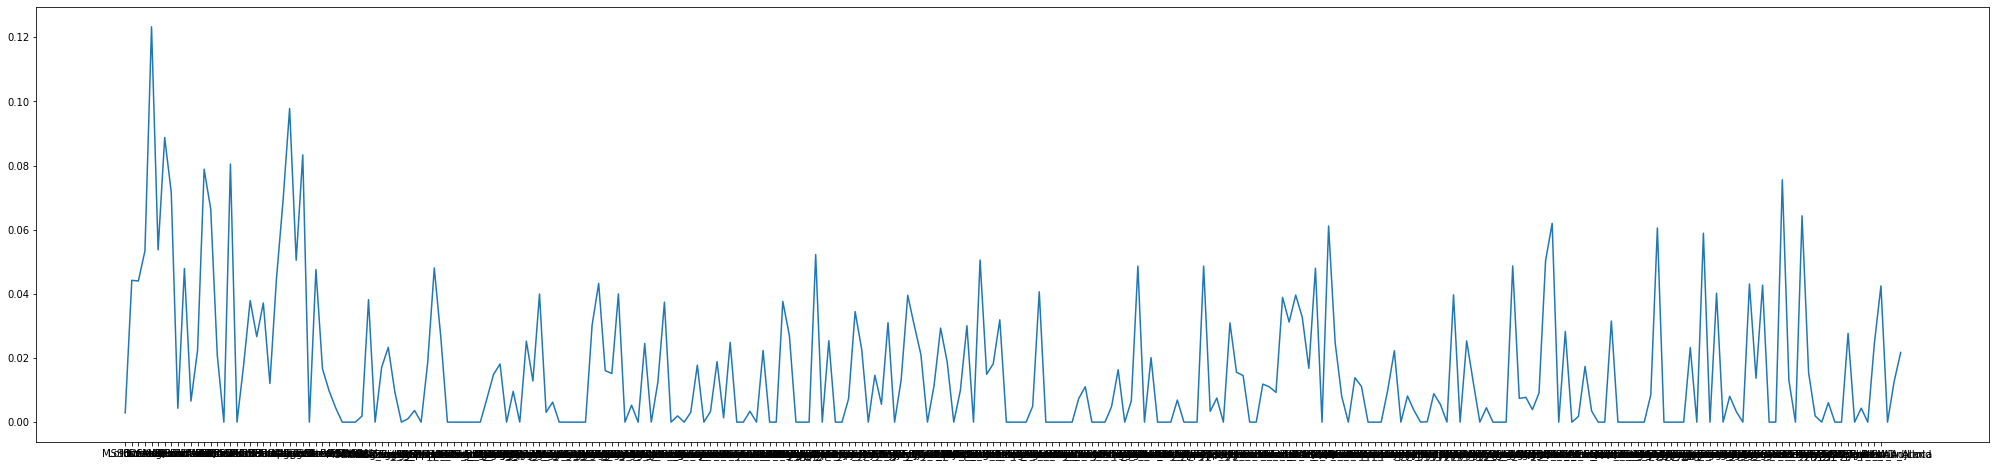

In [34]:
clf_selector = SelectKBest(mutual_info_regression, k=10)
clf_selector.fit(X_train,y_train['SalePriceGroup'])
clf_scores = clf_selector.scores_


plt.rcParams["figure.figsize"] = [35,8]
plt.plot(clf_scores)
plt.xticks(np.arange(268),list(X.columns));

In [35]:
clf_best_cols = [X_train.columns[i] for i,j in enumerate(clf_scores) if j > 0.06]
clf_best_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'BsmtQual_Gd',
 'CentralAir_Y',
 'Functional_Typ',
 'GarageCond_TA',
 'PavedDrive_Y']

### Regression Tree

In [36]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5)}
regressor1 = GridSearchCV(tree.DecisionTreeRegressor(criterion='mse', random_state=202), 
                          parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
regressor1.fit(X=X_train, y=y_train['SalePrice'])
tree_model1 = regressor1.best_estimator_
print('Best regressorTree1 ', regressor1.best_score_, regressor1.best_params_) 

Fitting 5 folds for each of 68 candidates, totalling 340 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.6s


Best regressorTree1  0.670653523674879 {'max_depth': 11, 'min_samples_leaf': 1}


[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    3.6s finished


In [37]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5)}
regressor2 = GridSearchCV(tree.DecisionTreeRegressor(criterion='mse', random_state=202), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
regressor2.fit(X=X_train[regre_best_cols], y=y_train['SalePrice'])
tree_model2 = regressor2.best_estimator_
print('Best regressorTree2 ', regressor2.best_score_, regressor2.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 68 candidates, totalling 340 fits
Best regressorTree2  0.7391901406509255 {'max_depth': 6, 'min_samples_leaf': 4}


[Parallel(n_jobs=4)]: Done 238 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    0.5s finished


### Regression RF

In [38]:
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)

In [39]:
# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
regressorRF1 = GridSearchCV(RandomForestRegressor(criterion='mse', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
regressorRF1.fit(X=X_train, y=y_train['SalePrice'])
RF_model1 = regressorRF1.best_estimator_
print('Best regressorRF ', regressorRF1.best_score_, regressorRF1.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   59.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 1020 out of 1020 | elapsed:  9.8min finished


Best regressorRF  0.8294597471450634 {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 150}


In [40]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
regressorRF2 = GridSearchCV(RandomForestRegressor(criterion='mse', random_state=202), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
regressorRF2.fit(X=X_train[regre_best_cols], y=y_train['SalePrice'])
RF_model2 = regressorRF2.best_estimator_
print('Best regressorRF2 ', regressorRF2.best_score_, regressorRF2.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   57.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1020 out of 1020 | elapsed:  2.5min finished


Best regressorRF2  0.8153210999416343 {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 150}


### Classifier Tree

In [41]:
# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5)}
classifier1 = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini', random_state=202), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
classifier1.fit(X=X_train, y=y_train['SalePriceGroup'])
treeclass_model1 = classifier1.best_estimator_
print('Best classifierTree1 ', classifier1.best_score_, classifier1.best_params_)

Fitting 5 folds for each of 68 candidates, totalling 340 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.2s


Best classifierTree1  0.9393639406982306 {'max_depth': 4, 'min_samples_leaf': 3}


[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    2.3s finished


In [42]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5)}
classifier2 = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini', random_state=202), parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
classifier2.fit(X=X_train[clf_best_cols], y=y_train['SalePriceGroup'])
treeclass_model2 = classifier2.best_estimator_
print('Best classifierTree2 ', classifier2.best_score_, classifier2.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 68 candidates, totalling 340 fits
Best classifierTree2  0.9432568149210905 {'max_depth': 4, 'min_samples_leaf': 1}


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 340 out of 340 | elapsed:    1.0s finished


### Classifier RF

In [43]:
# Train with all features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
classifierRF1 = GridSearchCV(RandomForestClassifier(criterion='gini', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
classifierRF1.fit(X=X_train, y=y_train['SalePriceGroup'])
clfRF_model1 = classifierRF1.best_estimator_
print('Best classifierRF ', classifierRF1.best_score_, classifierRF1.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   19.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   46.6s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1020 out of 1020 | elapsed:  1.9min finished


Best classifierRF  0.9471736011477763 {'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 150}


In [44]:
# Train with only best corr features
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50,150,400]}
classifierRF2 = GridSearchCV(RandomForestClassifier(criterion='gini', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
classifierRF2.fit(X=X_train[clf_best_cols], y=y_train['SalePriceGroup'])
clfRF_model2 = classifierRF2.best_estimator_
print('Best classifierRF ', classifierRF2.best_score_, classifierRF2.best_params_)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 224 tasks      | elapsed:   19.8s
[Parallel(n_jobs=6)]: Done 474 tasks      | elapsed:   44.3s
[Parallel(n_jobs=6)]: Done 824 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1020 out of 1020 | elapsed:  1.7min finished


Best classifierRF  0.9491343854615018 {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 150}


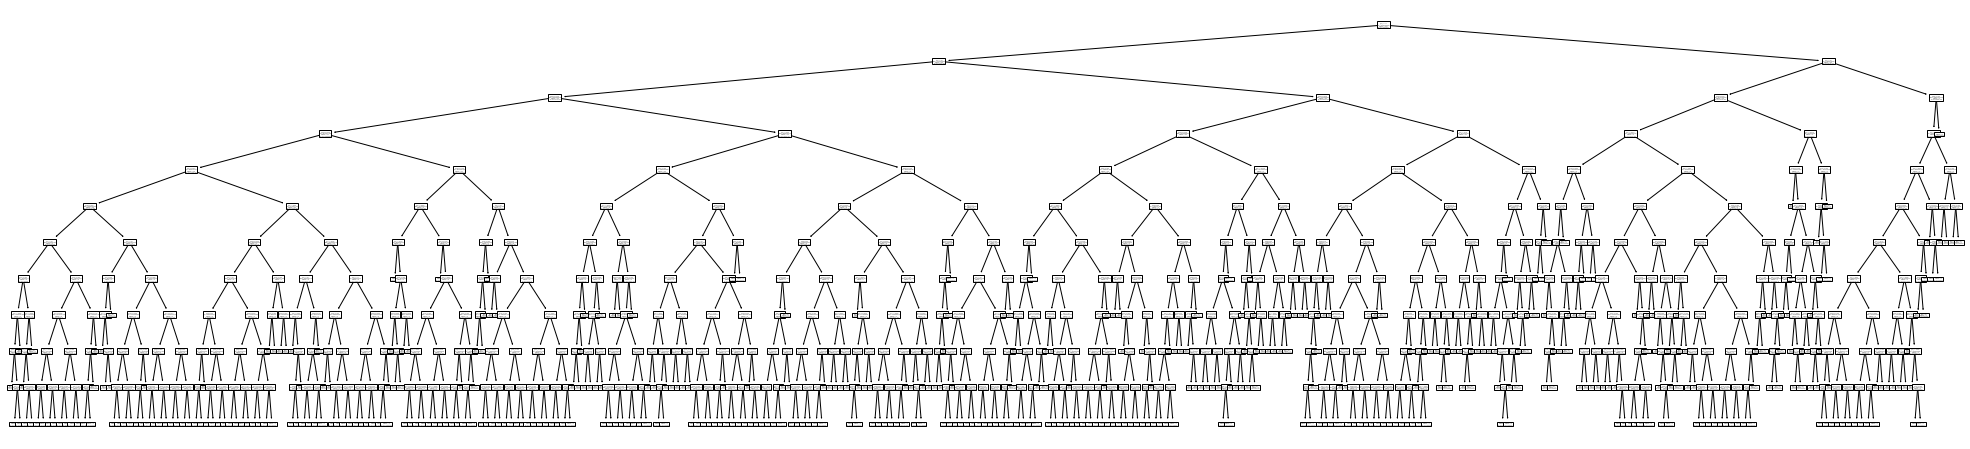

In [45]:
tree.plot_tree(tree_model1);

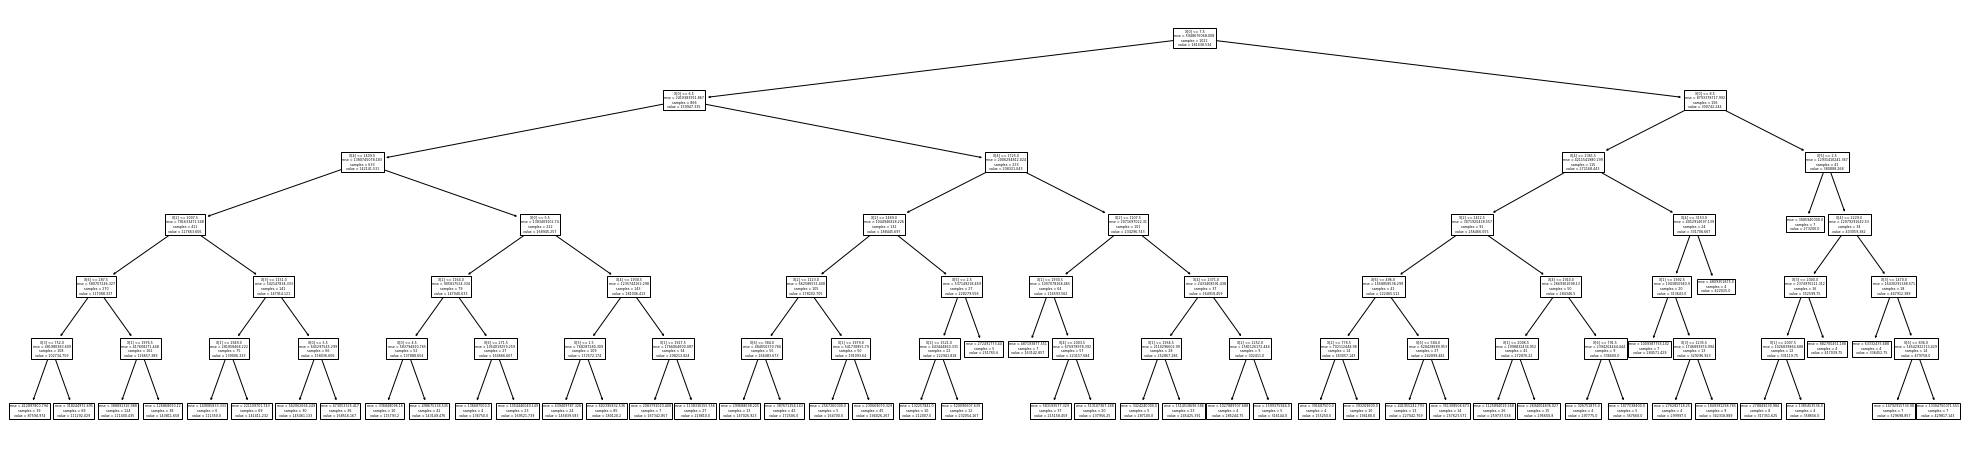

In [46]:
tree.plot_tree(tree_model2);

### Comparison

In [47]:
pred_regre_tree_all=tree_model1.predict(X_test) # 1. Predict tree regressor with all features
pred_regre_tree_best=tree_model2.predict(X_test[regre_best_cols]) # 2. Predict tree regressor with only best features
pred_regre_rf_all=RF_model1.predict(X_test) # 3. Predict random forest regressor with all features
pred_regre_rf_best=RF_model2.predict(X_test[regre_best_cols]) # 4. Predict random forest regressor with only best features

pred_clf_tree_all=treeclass_model1.predict(X_test) # 1. Predict tree classifier with all features
pred_clf_tree_best=treeclass_model2.predict(X_test[clf_best_cols]) # 2. Predict tree classifier with only best features
pred_clf_rf_all=clfRF_model1.predict(X_test) # 3. Predict random forest classifier with all features
pred_clf_rf_best=clfRF_model2.predict(X_test[clf_best_cols]) # 4. Predict random forest classifier with only best features

In [48]:
predict_regre_dict = {'pred_regre_tree_all':pred_regre_tree_all,
                      'pred_regre_tree_best':pred_regre_tree_best,
                      'pred_regre_rf_all':pred_regre_rf_all,
                      'pred_regre_rf_best':pred_regre_rf_best}

predict_clf_dict = {'pred_clf_tree_all':pred_clf_tree_all,
                      'pred_clf_tree_best':pred_clf_tree_best,
                      'pred_clf_rf_all':pred_clf_rf_all,
                      'pred_clf_rf_best':pred_clf_rf_best}

In [49]:
from sklearn.metrics import (mean_squared_error,confusion_matrix, plot_confusion_matrix, f1_score)

### Regressors

In [50]:
regre_scores = dict()
for i,j in predict_regre_dict.items():
    regre_scores[i] = mean_squared_error(y_test['SalePrice'], j, squared=False)

<BarContainer object of 4 artists>

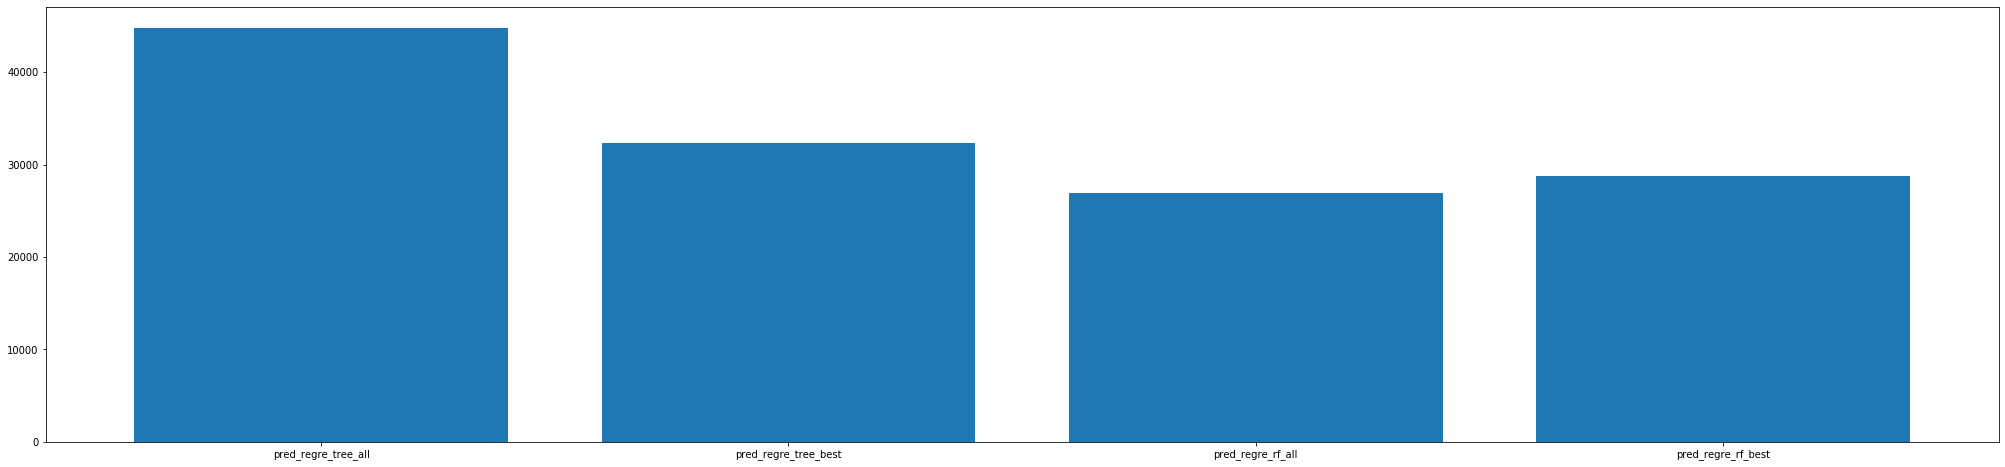

In [51]:
plt.bar(regre_scores.keys(), regre_scores.values())

In [69]:
print(*regre_scores.items(), sep='\n')
print(f'Best regressor model is {min(regre_scores, key=regre_scores.get)}')

('pred_regre_tree_all', 44806.08520324406)
('pred_regre_tree_best', 32290.23881695566)
('pred_regre_rf_all', 26901.21516563131)
('pred_regre_rf_best', 28719.19699504165)
Best regressor model is pred_regre_rf_all


### Classifiers

In [53]:
clf_scores = dict()
for i,j in predict_clf_dict.items():
    clf_scores[i] = confusion_matrix(y_test['SalePriceGroup'], j)

In [54]:
clf_scores

{'pred_clf_tree_all': array([[ 20,  26,   0],
        [  4, 386,   0],
        [  0,   2,   0]], dtype=int64),
 'pred_clf_tree_best': array([[ 21,  25,   0],
        [  5, 385,   0],
        [  0,   2,   0]], dtype=int64),
 'pred_clf_rf_all': array([[ 18,  28,   0],
        [  1, 389,   0],
        [  0,   1,   1]], dtype=int64),
 'pred_clf_rf_best': array([[ 23,  23,   0],
        [  4, 386,   0],
        [  0,   1,   1]], dtype=int64)}

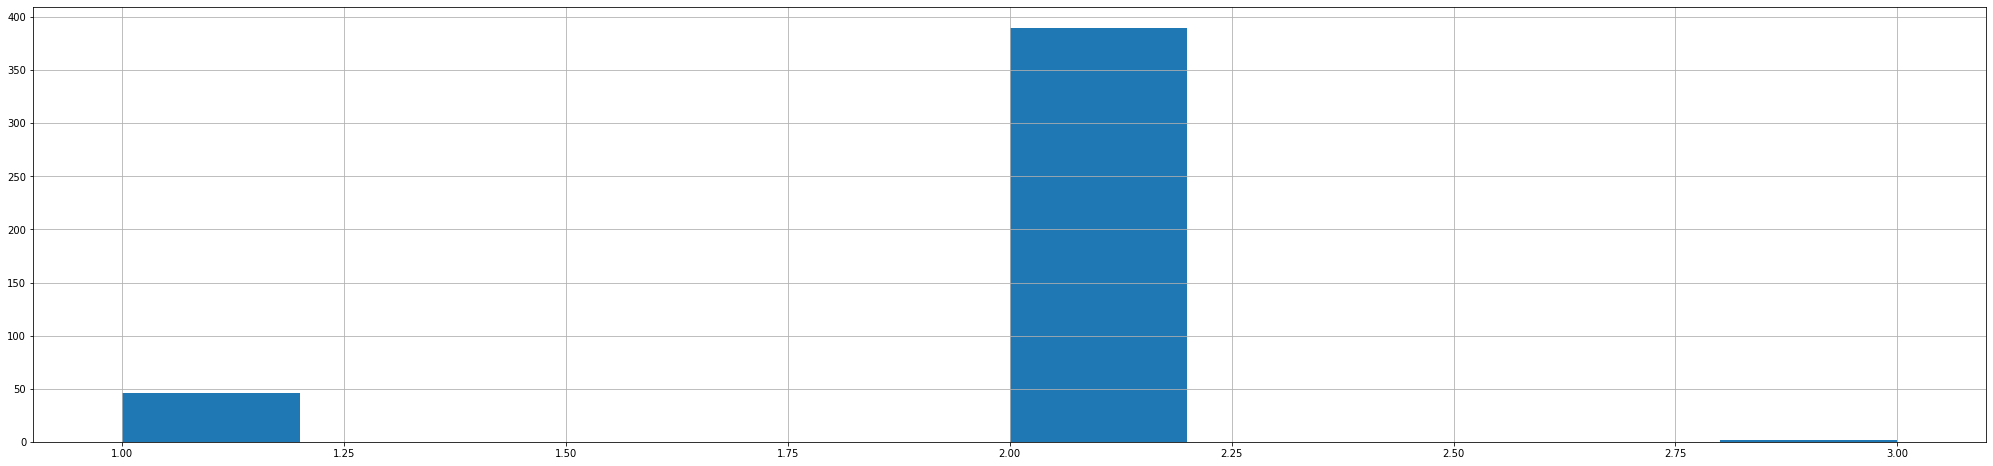

In [55]:
y_test['SalePriceGroup'].hist();

### treeclass_model1

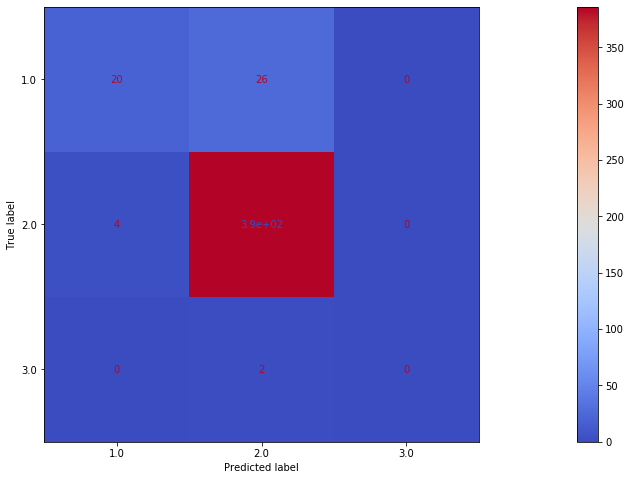

In [56]:
plot_confusion_matrix(treeclass_model1, X_test, y_test['SalePriceGroup'], cmap='coolwarm');

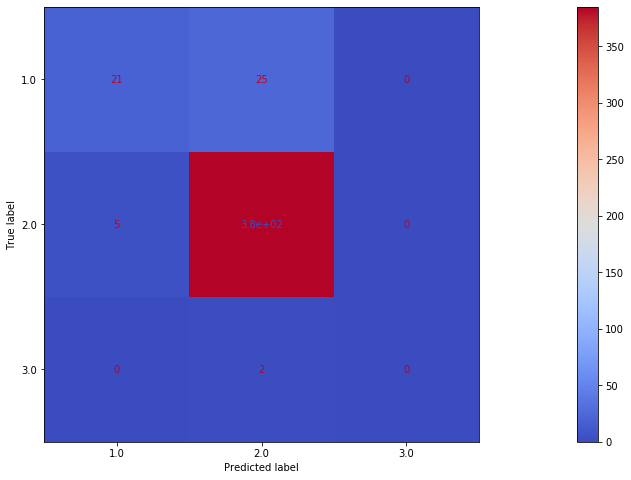

In [59]:
plot_confusion_matrix(treeclass_model2, X_test[clf_best_cols], y_test['SalePriceGroup'], cmap='coolwarm');

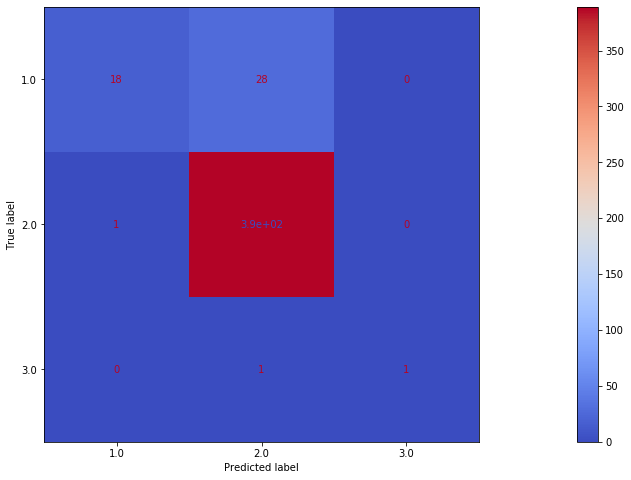

In [60]:
plot_confusion_matrix(clfRF_model1, X_test, y_test['SalePriceGroup'], cmap='coolwarm');

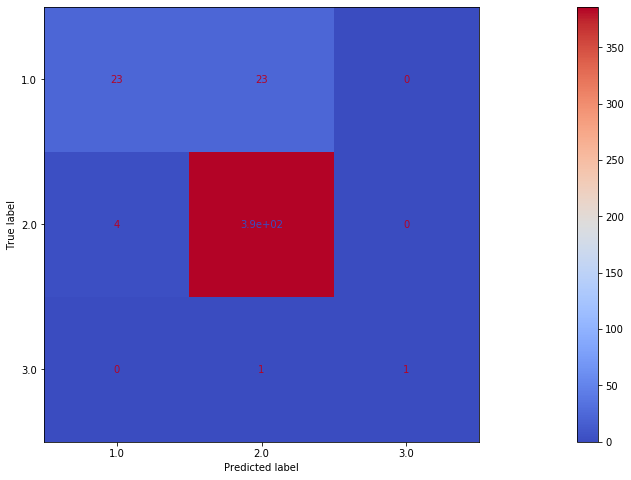

In [61]:
plot_confusion_matrix(clfRF_model2, X_test[clf_best_cols], y_test['SalePriceGroup'], cmap='coolwarm');

In [63]:
f1_clf_scores = dict()
for i,j in predict_clf_dict.items():
    f1_clf_scores[i] = f1_score(y_test['SalePriceGroup'], j, average='micro')

<BarContainer object of 4 artists>

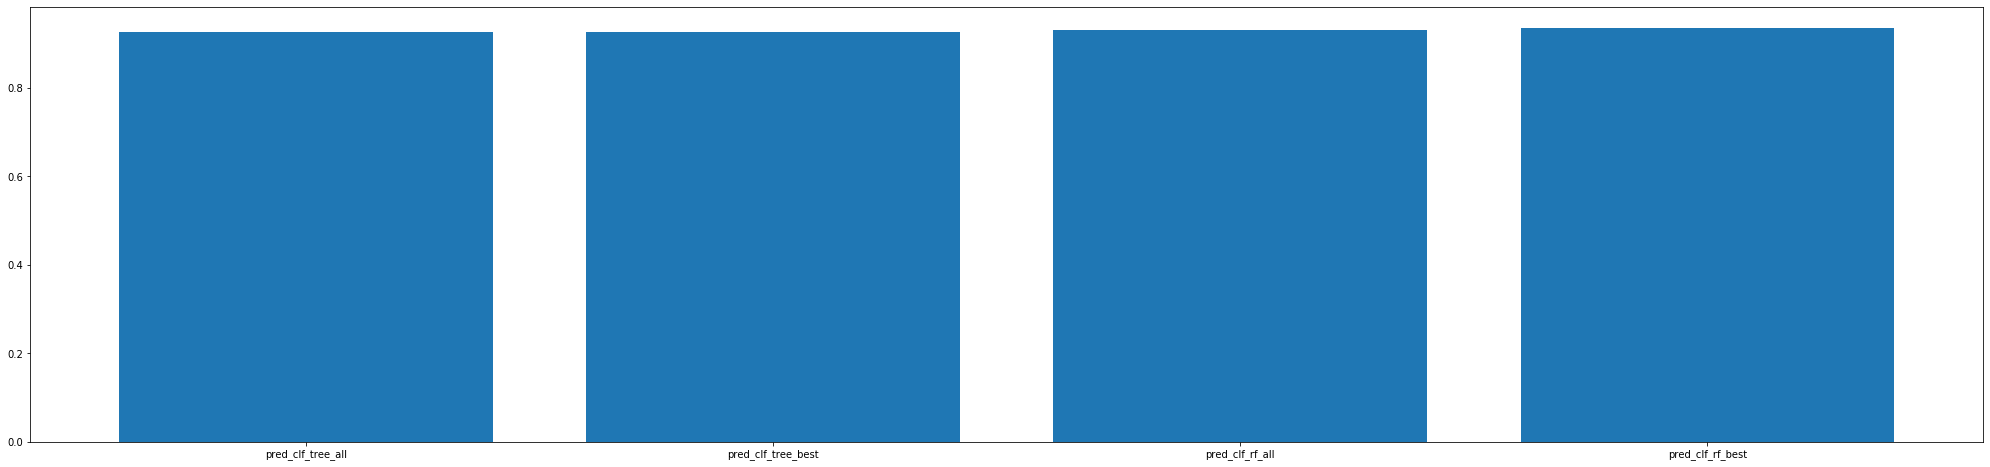

In [64]:
plt.bar(f1_clf_scores.keys(), f1_clf_scores.values())

In [71]:
print(*f1_clf_scores.items(), sep='\n')
print(f'Best classifier model is {max(f1_clf_scores, key=f1_clf_scores.get)}')

('pred_clf_tree_all', 0.9269406392694064)
('pred_clf_tree_best', 0.9269406392694064)
('pred_clf_rf_all', 0.9315068493150684)
('pred_clf_rf_best', 0.9360730593607306)
Best regressor model is pred_clf_rf_best


___END___